# Simple Linear Regression (Built-in Libraries)

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = {
    'Length': [1.8, 1.85, 1.9, 2.0, 2.1, 2.2, 2.25, 2.3, 2.4, 2.5, 2.6, 2.7],
    'Age':    [0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 10.0, 15.0, 20.0, 30.0]
}
df = pd.DataFrame(data)

In [ ]:
X = df[['Length']]
y = df['Age']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
print(len(x_train))
print(len(x_test))

8
4


In [ ]:
model = LinearRegression().fit(x_train, y_train)

In [ ]:
print(model.coef_[0])
print(model.intercept_)

22.686015831134565
-42.07994722955145


In [ ]:
model.score(x_train, y_train)

0.9222428563408747

In [ ]:
model.score(x_test, y_test)

0.7413456358439505

In [ ]:
y_pred = model.predict(x_train)

In [ ]:
print(x_train.T)
print(y_pred)

         4    9    10   8    3    0     6    2 
Length  2.1  2.5  2.6  2.4  2.0  1.8  2.25  1.9
[ 5.56068602 14.63509235 16.90369393 12.36649077  3.29208443 -1.24511873
  8.96358839  1.02348285]


In [ ]:
y_pred_test = model.predict(x_test)

In [ ]:
print(x_test.T)
print(y_pred_test)

         7     1    5    11
Length  2.3  1.85  2.2  2.7
[10.09788918 -0.11081794  7.8292876  19.17229551]


In [ ]:
MSE = mean_squared_error(y_test, y_pred_test)
print(f"MSE: {MSE}")

MSE: 32.71977706574025


In [ ]:
r2 = r2_score(y_test, y_pred_test)
print(f"r2: {r2}")

r2: 0.7413456358439505


In [ ]:
r = np.sqrt(r2)
print(f"Correlation r: {r}")

Correlation r: 0.8610143064107301


In [ ]:
residuals = y_train - y_pred

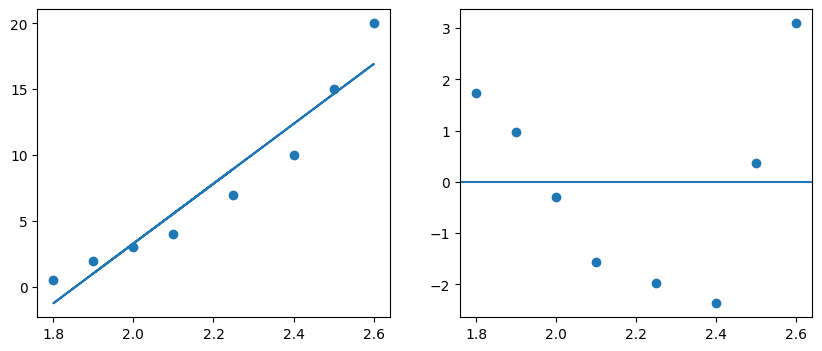

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred)

plt.subplot(1,2,2)
plt.scatter(x_train, residuals)
plt.axhline(y=0)

plt.show()

# Transformed Simple Linear Regression (Theory)

Apply a log transformation on the target with:

- df['Log_Age'] = np.log(df['Age'])

And then train a linear model on the transformed target.

To look at the prediction on the original data

- df['Age_Predicted'] = np.exp(df['Log_Predicted'])

# Multiple Linear Regression (Built-in Libraries)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
np.random.seed(42) # For reproducible results
n_samples = 500

# Feature 1: House Size (sq ft)
size = np.random.randint(500, 3500, n_samples)

# Feature 2: Number of Bedrooms
bedrooms = np.random.randint(1, 6, n_samples)

# Target: Price ($) + Random Noise (Standard deviation = 15k)
noise = np.random.normal(0, 15000, n_samples)
price = 50000 + (150 * size) + (25000 * bedrooms) + noise

# Store in DataFrame
df = pd.DataFrame({'Size': size, 'Bedrooms': bedrooms, 'Price': price})

print("--- Data Snapshot ---")
print(df.head())
print("-" * 30)

--- Data Snapshot ---
   Size  Bedrooms          Price
0  1360         5  390442.709362
1  1794         4  428669.500485
2  1630         2  337863.514376
3  1595         4  396130.652573
4  2138         2  430500.996069
------------------------------


In [ ]:
X = df[['Size', 'Bedrooms']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

375
375
125
125


In [ ]:
model = LinearRegression().fit(X_train, y_train)

In [ ]:
model.score(X_train, y_train)

0.9863940064282413

In [ ]:
y_test_pred = model.predict(X_test)

In [ ]:
print(y_test_pred)

[550634.80468882 237321.17850151 271809.60940016 299163.36615064
 230054.08304891 196469.2791607  589547.02870431 640979.32253601
 178641.68538893 426329.82818627 250311.24502026 682696.76951823
 378080.12506285 453231.77143153 431450.38124546 460422.70814605
 606960.8883399  424635.09929808 381957.76273907 652575.86917006
 611366.49825942 406411.95458744 259460.04025741 693239.08464009
 405697.01144777 542502.16159481 520194.51213985 549373.70610854
 687666.71807567 392556.34042728 469252.11118241 365071.87534678
 391238.97928065 389977.88070037 166649.58781601 328850.6361909
 498977.46059171 371905.34049147 556715.2473248  313187.76800985
 511533.89680255 590828.02345631 578552.90007723 521098.1391503
 251383.65972976 453249.95462884 485818.6063739  322224.03811431
 309856.28577424 393837.33517928 422452.19051004 675015.93992944
 634653.9334629  203585.77011156 381957.76273907 523564.0737445
 579287.73938862 568763.60746407 654740.59476078 377477.70705588
 358764.66947098 294193.4175

In [ ]:
intercept = model.intercept_
intercept

51192.19754713331

In [ ]:
thetas = model.coef_
thetas

array([  150.60450174, 24642.87571915])

In [ ]:
r2_score(y_test, y_test_pred)

0.9849062200195546

In [ ]:
MSE = mean_squared_error(y_test, y_test_pred)
MSE

299449607.1835714

In [ ]:
RMSE = np.sqrt(MSE)
print(f"RMSE (same unit as target, i.e. dollars): {RMSE}")

RMSE (same unit as target, i.e. dollars): 17304.612309542546


In [ ]:
print("R2 is 98%, which suggests that the model is able to explain 98% of the data accurately. The rest 2% is noise, which our selected features are unable to explain, such as the color of the house or the owner of the house put too much price on the house without proper market research.")

R2 is 98%, which suggests that the model is able to explain 98% of the data accurately. The rest 2% is noise, which our selected features are unable to explain, such as the color of the house or the owner of the house put too much price on the house without proper market research.


In [ ]:
print("RMSE is 17k dollars, which means, our predictions for house prices are off by an average of 17K dollars.")

RMSE is 17k dollars, which means, our predictions for house prices are off by an average of 17K dollars.


# Multiple Linear Regression (Manual)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df.head()

,Size,Bedrooms,Price
0,1360,5,390442.709362
1,1794,4,428669.500485
2,1630,2,337863.514376
3,1595,4,396130.652573
4,2138,2,430500.996069


In [ ]:
X = df[['Size', 'Bedrooms']].to_numpy()
y = df['Price'].to_numpy()
print(X.shape)
print(y.shape)

(500, 2)
(500,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

350
350
150
150


In [ ]:
ones = np.ones((len(X_train), 1))
X_train = np.hstack((ones, X_train))
X_train.shape

(350, 3)

In [ ]:
# Apply the normal equation for optimal parameters

XT = X_train.T
XTX = XT @ X_train
XTX_inv = np.linalg.inv(XTX)
thetas = XTX_inv @ XT @ y_train

intercept = thetas[0]
size_slope = thetas[1]
room_slope = thetas[2]

print(f"Intercept: {intercept:.4f}\nSize Slope: {size_slope:.4f}\nRoom Slope: {room_slope:.4f}")

Intercept: 54709.58748621404
Size Slope: 149.72680057820966
Room Slope: 24049.00828128851


In [ ]:
ones = np.ones((len(X_test), 1))
X_test = np.hstack((ones, X_test))

In [ ]:
y_pred = X_test @ thetas

In [ ]:
residuals = y_test - y_pred
mse = np.mean(residuals**2)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.4f}\nRMSE (same unit as target i.e. dollars): {rmse:.4f}")

MSE: 260499927.0274
RMSE (same unit as target i.e. dollars): 16140.010130956645


In [ ]:
r2 = np.var(y_pred) / np.var(y_test)
print(f"R-Squared: {r2:.4f}")

R-Squared: 0.9757


In [ ]:
print("RMSE is 16k dollars, which implies that our model are off by an average of 16k dollars when predicting price.")
print("\nR-Squared is 97%, which means our model is able to explain 97% of the test data with the selected features (size, bedrooms). The remaining 3% is noise for which our selected features are unable to explain.")

RMSE is 16k dollars, which implies that our model are off by an average of 16k dollars when predicting price.

R-Squared is 97%, which means our model is able to explain 97% of the test data with the selected features (size, bedrooms). The remaining 3% is noise for which our selected features are unable to explain.


# Constant Model

In [ ]:
X = df[['Size', 'Bedrooms']]
y = df['Price'].to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

350
350
150
150


In [ ]:
theta_0 = np.mean(y_train)
print(f"Optimal Constant: {theta_0:.4f}")

# We create an array of the same size as X, filled with theta_0 for visualization
theta_0_list = np.full(shape=X.shape, fill_value=theta_0)

Optimal Constant: 430526.4201


In [ ]:
residuals = y_test - theta_0
mse = np.mean(residuals**2)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.4f}\nRMSE (same unit as target i.e. dollars): {rmse:.4f}")

MSE: 17881592572.2314
RMSE (same unit as target i.e. dollars): 133722.0721


In [ ]:
# Note: The variance of a constant list (e.g., [5, 5, 5]) is always 0.
r2 = np.var(theta_0) / np.var(y_test)
print(f"R-Squared: {r2}")

R-Squared: 0.0


In [ ]:
print(f"This optimal parameter {theta_0} is the mean of our training set. It represents our best guess if we knew nothing about house sizes.")

This optimal parameter 430526.42008215183 is the mean of our training set. It represents our best guess if we knew nothing about house sizes.


In [ ]:
print("The model explains 0% of the variance. Because the predictions are a flat line, they have zero variance = 0$). Since the numerator is 0, the ratio is 0.")
print(f"\nComparing this {rmse} huge error to the much smaller error of our MLR model (from the previous step) proves that our features (Size/Bedrooms) are actually useful.")

The model explains 0% of the variance. Because the predictions are a flat line, they have zero variance = 0$). Since the numerator is 0, the ratio is 0.

Comparing this 133722.07212061665 huge error to the much smaller error of our MLR model (from the previous step) proves that our features (Size/Bedrooms) are actually useful.


# MLR with One-Hot Encoding (Pandas)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = {
    'Experience_Years': [1, 2, 3, 5, 8, 10, 1, 3, 5, 7, 2, 4, 6, 9],
    'Education': [
        'High School', 'High School', 'High School', 'High School', 'High School', 'High School',
        'Bachelors', 'Bachelors', 'Bachelors', 'Bachelors',
        'Masters', 'Masters', 'Masters', 'Masters'
    ],
    # The "Hidden" Logic used to generate this:
    # Base (High School) = $30,000 + ($2,000 per year of exp)
    # Bachelors Bonus    = +$10,000
    # Masters Bonus      = +$25,000
    'Salary': [
        32000, 34000, 36000, 40000, 46000, 50000,   # High School
        42000, 46000, 50000, 54000,                 # Bachelors (Base + 10k)
        59000, 63000, 67000, 73000                  # Masters (Base + 25k)
    ]
}

df = pd.DataFrame(data)
print(df.head())
print("-" * 30)

   Experience_Years    Education  Salary
0                 1  High School   32000
1                 2  High School   34000
2                 3  High School   36000
3                 5  High School   40000
4                 8  High School   46000
------------------------------


In [ ]:
# Bachelor's will be dropped because alphabetically it comes first,
# and also that one-hot encoding sorts the columns horizontally.
df_encoded = pd.get_dummies(df, columns=['Education'], drop_first=True, dtype=int)
df_encoded.head()

,Experience_Years,Salary,Education_High School,Education_Masters
0,1,32000,1,0
1,2,34000,1,0
2,3,36000,1,0
3,5,40000,1,0
4,8,46000,1,0


In [ ]:
X = df_encoded.drop(columns=['Salary'])
X.head()

,Experience_Years,Education_High School,Education_Masters
0,1,1,0
1,2,1,0
2,3,1,0
3,5,1,0
4,8,1,0


In [ ]:
y = df_encoded['Salary']
y.head()

0    32000
1    34000
2    36000
3    40000
4    46000
Name: Salary, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

10
10
4
4


In [ ]:
model = LinearRegression().fit(X_train, y_train)
model.score(X_train, y_train)

1.0

In [ ]:
intercept = model.intercept_
coefs = model.coef_
feature_names = X.columns

print("--- Model Results ---")
print(f"Intercept (Baseline): ${intercept:,.2f}")

for name, val in zip(feature_names, coefs):
    print(f"Coefficient for {name}: ${val:,.2f}")

--- Model Results ---
Intercept (Baseline): $40,000.00
Coefficient for Experience_Years: $2,000.00
Coefficient for Education_High School: $-10,000.00
Coefficient for Education_Masters: $15,000.00


In [ ]:
y_test_pred = model.predict(X_test)
y_test_pred

array([54000., 63000., 32000., 67000.])

In [ ]:
residuals = y_test - y_test_pred
mse = np.mean(residuals**2)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.4f}\nRMSE (same unit as target i.e. dollars): {rmse:.4f}")

MSE: 0.0000
RMSE (same unit as target i.e. dollars): 0.0000


In [ ]:
r2 = r2_score(y_test, y_test_pred)
print(f"R-Squared: {r2}")

R-Squared: 1.0


In [ ]:
print("RMSE = 0.00 means predictions are exact, all the observed original datapoints lie exactly on the predicted linear regression line. There is no residual at all.")

RMSE = 0.00 means predictions are exact, all the observed original datapoints lie exactly on the predicted linear regression line. There is no residual at all.


In [ ]:
print("R2 implies that 100% of the salary differences are explained by Experience and Education")

R2 implies that 100% of the salary differences are explained by Experience and Education


# MLR with K-Fold

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [ ]:
np.random.seed(42) # For reproducible results
n_samples = 500

# Feature 1: House Size (sq ft)
size = np.random.randint(500, 3500, n_samples)

# Feature 2: Number of Bedrooms
bedrooms = np.random.randint(1, 6, n_samples)

# Target: Price ($) + Random Noise (Standard deviation = 15k)
noise = np.random.normal(0, 15000, n_samples)
price = 50000 + (150 * size) + (25000 * bedrooms) + noise

# Store in DataFrame
df = pd.DataFrame({'Size': size, 'Bedrooms': bedrooms, 'Price': price})

print("--- Data Snapshot ---")
print(df.head())
print("-" * 30)

--- Data Snapshot ---
   Size  Bedrooms          Price
0  1360         5  390442.709362
1  1794         4  428669.500485
2  1630         2  337863.514376
3  1595         4  396130.652573
4  2138         2  430500.996069
------------------------------


In [ ]:
def train_model(X, y):
  scores = []
  kf = KFold(n_splits=5, shuffle=True)
  fold_number = 0

  for train_index, test_index in kf.split(X):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = LinearRegression()
    model.fit(x_train, y_train)

    score = model.score(x_test, y_test)
    scores.append(score)

    print(f"\nFold {fold_number}:")
    print(f"  Test Indices: {test_index}")
    print(f"  Score (R^2):  {score:.2f}")
    fold_number += 1


  print(f"\nAverage R^2: {np.mean(scores):.4f}")
  print(f"Standard Deviation: {np.std(scores):.4f}")

  return

In [ ]:
X = df[['Size', 'Bedrooms']].to_numpy()
y = df['Price'].to_numpy()

train_model(X, y)


Fold 1:
  Test Indices: [  4   9  21  23  26  32  33  34  40  45  46  66  69  77  78  79  86  90
  91  96  99 104 116 120 121 123 133 140 145 146 150 156 157 158 160 161
 162 164 167 172 174 177 185 193 197 198 201 204 212 227 240 244 247 254
 262 266 268 271 273 274 279 284 290 294 296 302 306 309 333 335 336 346
 347 351 352 353 357 361 364 366 369 371 372 378 385 409 412 413 422 428
 447 453 457 459 467 469 470 471 485 498]
  Score (R^2):  0.98

Fold 2:
  Test Indices: [  0   1   8  11  14  15  16  20  22  29  36  41  43  56  62  65  80  82
  84 101 102 106 107 108 110 114 122 128 134 135 136 139 151 153 163 171
 173 179 203 216 220 231 236 239 243 252 253 256 258 261 278 283 286 293
 300 307 310 313 318 324 327 328 337 341 343 345 356 359 360 362 370 373
 376 379 383 384 386 392 399 400 404 406 416 417 418 425 429 430 436 439
 442 446 452 455 472 473 477 487 492 496]
  Score (R^2):  0.99

Fold 3:
  Test Indices: [  5  17  31  37  39  52  53  61  64  68  75  76  81  88  95  98 105 

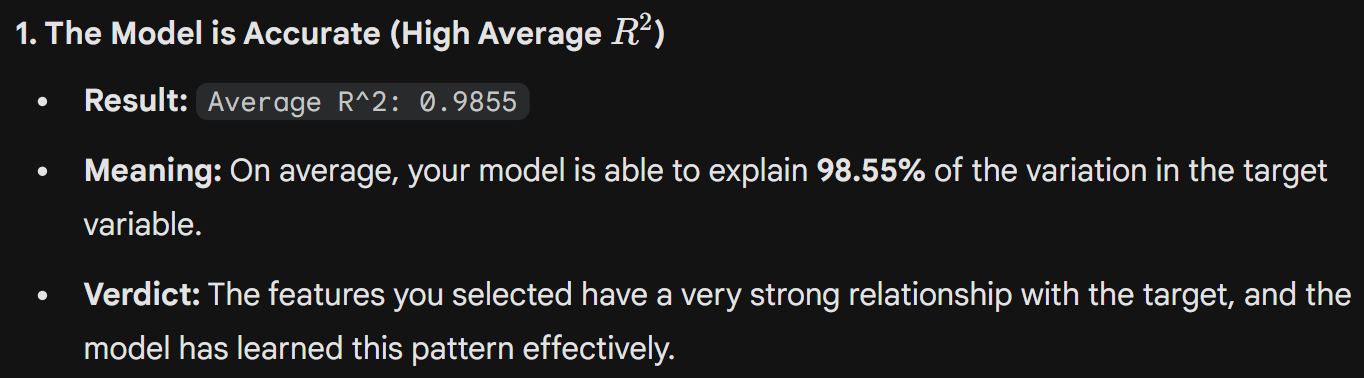

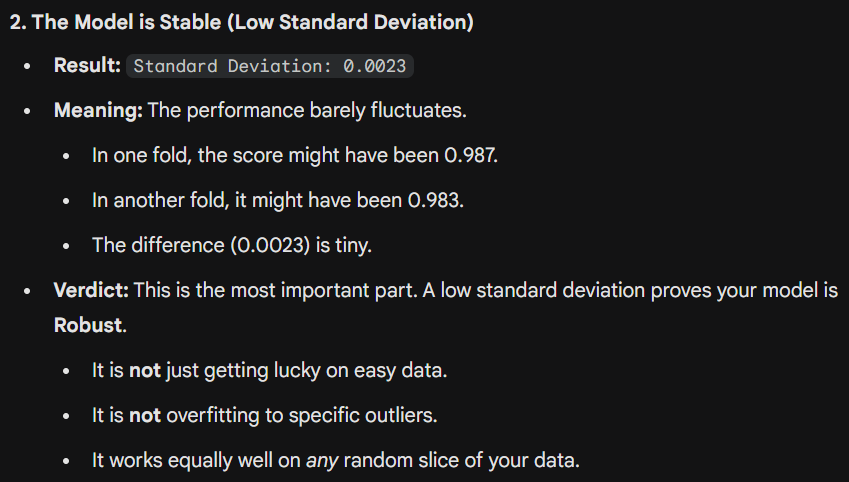

# Logistic Regression (Binary)

## 1

Intercept: -4.94
Weight (Slope): 1.41

Decision Boundary: 3.50 Hours
If you study MORE than 3.50 hours, the model predicts PASS.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


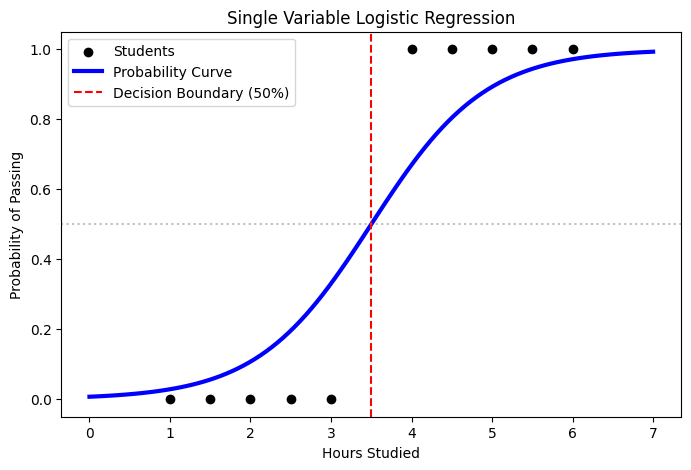

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# --- 1. Create Simple Data ---
# Hours Studied vs. Result (0=Fail, 1=Pass)
data = {
    'Hours':  [1, 1.5, 2, 2.5, 3,    4, 4.5, 5, 5.5, 6],
    'Result': [0, 0,   0, 0,   0,    1, 1,   1, 1,   1]
}
df = pd.DataFrame(data)

# Features (X) must be 2D [[1], [1.5]...]
X = df[['Hours']]
y = df['Result']

# --- 2. Train the Model ---
model = LogisticRegression()
model.fit(X, y)

# --- 3. The Math (Coefficients) ---
intercept = model.intercept_[0]
weight = model.coef_[0][0]

print(f"Intercept: {intercept:.2f}")
print(f"Weight (Slope): {weight:.2f}")

# --- 4. Prediction & Decision Boundary ---
# The Decision Boundary is where Probability is exactly 50%.
# Mathematically, this happens when x = -Intercept / Weight
boundary = -intercept / weight

print(f"\nDecision Boundary: {boundary:.2f} Hours")
print(f"If you study MORE than {boundary:.2f} hours, the model predicts PASS.")

# --- 5. Visualization ---
# Create a range of hours to plot the smooth S-curve
x_range = np.linspace(0, 7, 100).reshape(-1, 1)
# Calculate probabilities for the curve
y_prob = model.predict_proba(x_range)[:, 1]

plt.figure(figsize=(8, 5))

# Plot the Data Points (Failures at bottom, Passes at top)
plt.scatter(df['Hours'], df['Result'], color='black', zorder=20, label='Students')

# Plot the "S" Curve (The Model)
plt.plot(x_range, y_prob, color='blue', linewidth=3, label='Probability Curve')

# Plot the Decision Boundary
plt.axvline(x=boundary, color='red', linestyle='--', label='Decision Boundary (50%)')
plt.axhline(y=0.5, color='gray', linestyle=':', alpha=0.5)

plt.title('Single Variable Logistic Regression')
plt.ylabel('Probability of Passing')
plt.xlabel('Hours Studied')
plt.legend()
plt.show()

## 2

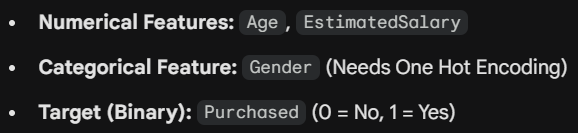

### Data Encoding, Splitting, Standardization, and Model Training

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss, precision_score, recall_score, f1_score, roc_curve, auc

# Set seed for reproducibility (so you get the same numbers as me)
np.random.seed(42)

data = {
    # 1. Numerical Feature: Age (18 to 60)
    'Age': [19, 35, 26, 27, 19, 27, 27, 32, 25, 35, 26, 26, 20, 32, 18, 29, 47, 45, 46, 48, 45, 47, 48, 45, 46],

    # 2. Numerical Feature: Salary ($15k to $150k)
    'Salary': [19000, 20000, 43000, 57000, 76000, 58000, 84000, 150000, 33000, 65000,
                        80000, 52000, 86000, 18000, 82000, 80000, 25000, 26000, 28000, 29000,
                        22000, 49000, 41000, 22000, 49000],

    # 3. Categorical Feature: Gender (Needs One Hot Encoding)
    'Gender': ['Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female',
               'Female', 'Female', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female',
               'Male', 'Female', 'Male', 'Male', 'Female'],

    # 4. Target Variable: Purchased (0 or 1)
    # Logic: Generally, older people with money bought it (1)
    'Purchased': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
                  0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
                  1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)

print("--- Data Snapshot ---")
print(df.head())
print("-" * 30)

# One Hot Encoding
# The built-in libraries add the Bias (Intercept) automatically. So we need to drop any one category.
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True, dtype='int')
print(df_encoded.head())

X = df_encoded[['Age', 'Salary', 'Gender_Male']]
y = df['Purchased']

# # Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print("\nLengths of data sets after splitting:")
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

# # 2. Standardize data - You should ALWAYS standardize AFTER splitting.
# Doing it before splitting is a fundamental mistake called Data Leakage.

# Select only the numerical columns for scaling
numerical_cols = ['Age', 'Salary']

sc = StandardScaler()
X_train[numerical_cols] = sc.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = sc.transform(X_test[numerical_cols])
print("\nTraining Set X:")
print(X_train.head())

model = LogisticRegression().fit(X_train, y_train)
intercept = model.intercept_[0]
slopes = model.coef_[0]

print(f"\nIntercept: {intercept:.2f}")
print(f"Slopes: {slopes}")

print("\nCoefficient with columns:")
coef_df = pd.DataFrame({
    'Features': X_train.columns,
    'Coefficients': slopes # provide 1D arrays only
})
print(coef_df)

print(f"\nR2 score on Training set: {model.score(X_train, y_train)}")
print(f"R2 score on Test set: {model.score(X_test, y_test)}")

--- Data Snapshot ---
   Age  Salary  Gender  Purchased
0   19   19000    Male          0
1   35   20000    Male          0
2   26   43000  Female          0
3   27   57000  Female          0
4   19   76000    Male          0
------------------------------
   Age  Salary  Purchased  Gender_Male
0   19   19000          0            1
1   35   20000          0            1
2   26   43000          0            0
3   27   57000          0            0
4   19   76000          0            1

Lengths of data sets after splitting:
18
7
18
7

Training Set X:
         Age    Salary  Gender_Male
1   0.098361 -1.231151            1
22  1.309756 -0.566329            1
5  -0.647113 -0.028141            1
2  -0.740297 -0.503013            0
12 -1.299402  0.858288            1

Intercept: -0.30
Slopes: [ 2.00463901  0.31448491 -0.13983736]

Coefficient with columns:
      Features  Coefficients
0          Age      2.004639
1       Salary      0.314485
2  Gender_Male     -0.139837

R2 score on Trainin

### Pridict Probabilites

In [55]:
y_test_prob = model.predict_proba(X_test)[:, 1]
print("\nPredicted Probabilites for Purchased:")
print(y_test_prob)


Predicted Probabilites for Purchased:
[0.08541237 0.85800563 0.02580179 0.7782533  0.13526586 0.48886558
 0.22922059]


### Threshold Tuning

In [ ]:
# 1. Create a list of thresholds to test
thresholds = np.arange(0.0, 1.0, 0.01) # 0.00, 0.01, ... 0.99
f1_scores = []

# 2. Loop through them
for t in thresholds:
    # Apply threshold 't'
    y_pred_t = (y_test_prob >= t).astype(int)

    # Calculate F1 Score
    score = f1_score(y_test, y_pred_t)
    f1_scores.append(score)

# 3. Find the Winner
best_f1 = max(f1_scores)
best_thresh = thresholds[f1_scores.index(best_f1)]

print(f"--- Threshold Tuning Results ---")
print(f"Best Threshold: {best_thresh:.2f}")
print(f"Best F1 Score:  {best_f1:.4f}")

# 4. Visualization
plt.figure(figsize=(8, 5))
plt.plot(thresholds, f1_scores, color='blue')
plt.axvline(best_thresh, color='red', linestyle='--', label=f'Best: {best_thresh:.2f}')
plt.title('F1 Score vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
# Custom threshold of 0.3 or best_thresh
# y_pred_custom = (y_test_prob >= best_thresh).astype(int)
y_pred_custom = (y_test_prob >= 0.3).astype(int)
print(f"\nBinary Values of target: {y_pred_custom}")

# Convert the Series (y_test) to a DataFrame
results_df = y_test.to_frame(name='Actual_Purchased')
# We assign the raw numpy array 'y_pred_custom' directly to ignore index matching issues
results_df['Predicted_Purchased'] = y_pred_custom
print(results_df.head(10))


Binary Values of target: [0 1 0 1 0 1 0]
    Actual_Purchased  Predicted_Purchased
8                  0                    0
16                 1                    1
0                  0                    0
23                 1                    1
11                 0                    0
9                  0                    1
13                 0                    0


In [52]:
# --- STEP 6: Evaluation Metrics ---
print("\n--- 6. Performance Metrics ---")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_custom)
print("Confusion Matrix:\n", cm)

# Accuracy
acc = accuracy_score(y_test, y_pred_custom)
print(f"Accuracy:      {acc:.2f}")

# Precision (What % of predicted passes were real?)
prec = precision_score(y_test, y_pred_custom)
print(f"Precision:     {prec:.2f}")

# Recall (What % of real passes did we catch?)
rec = recall_score(y_test, y_pred_custom)
print(f"Recall:        {rec:.2f}")

# F1 Score (Harmonic mean of Prec/Recall)
f1 = f1_score(y_test, y_pred_custom)
print(f"F1 Score:      {f1:.2f}")

# Log Loss (Penalty for being confident but wrong)
ll = log_loss(y_test, y_test_prob)
print(f"Log Loss:      {ll:.4f}")


--- 6. Performance Metrics ---
Confusion Matrix:
 [[4 1]
 [0 2]]
Accuracy:      0.86
Precision:     0.67
Recall:        1.00
F1 Score:      0.80
Log Loss:      0.2280


Confusion Matrix:
* (False row) row 0 = **False** Positive Rate
  - (1 - sum of row 0) = **False** Negative Rate
* (True row) row 1 = **True** Postive Rate
  - (1 - sum of row 1) = **True** Negative Rate

Model Metrics:
- Accuracy = 0.86; Model Performance, our predictions our correct 86% of the time.
- Recall = 1.00; The true/actual positive rate, we caught every single person who actually bought the product.
- 1 - Recall = 0; The true/actual negative rate, we did not missed a single who bought the product because False Negative is zero.
- Precision = 0.67; The actual vs predicted positive rate, our predictions were only correct 67% of the time. Model pridicted they will buy the product, but some of them did not actually bought.

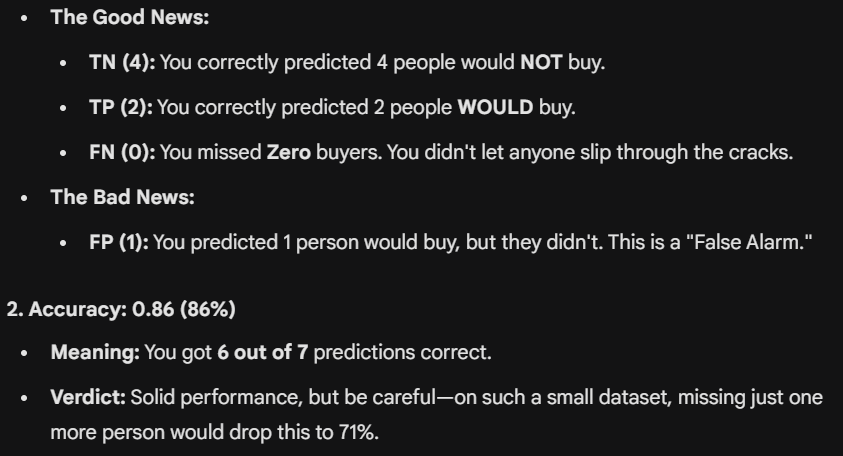

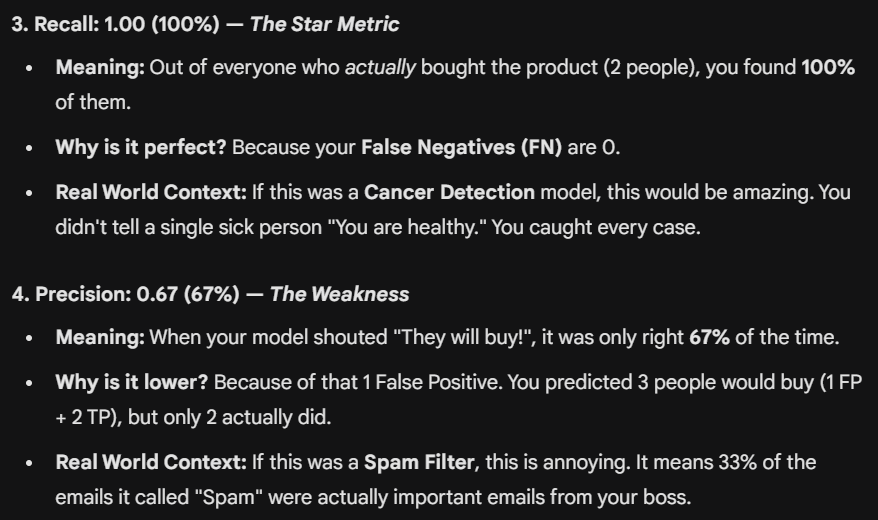

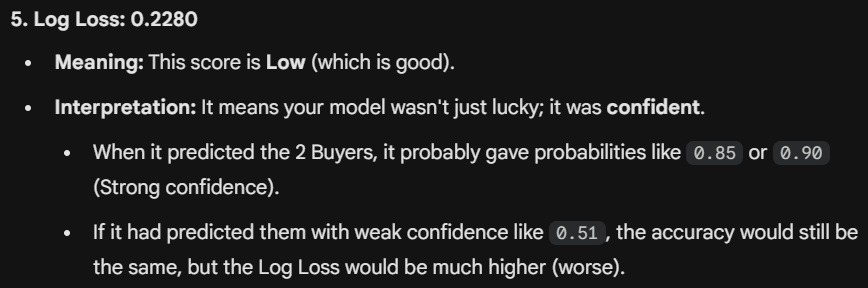

FPR: [0. 0. 0. 1.]
TPR: [0.  0.5 1.  1. ]
Thresholds: [       inf 0.85800563 0.7782533  0.02580179]

AUC Score: 1.0000


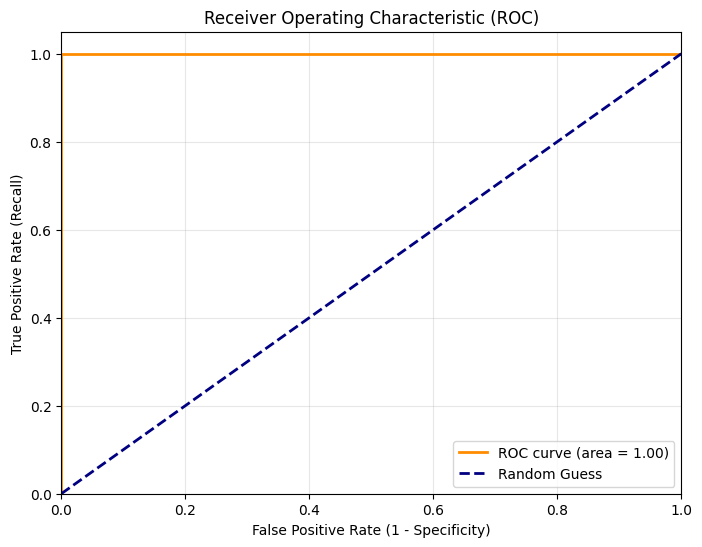

In [34]:
# ... (Your existing code matches perfectly) ...

# --- NEW SECTION: ROC Curve & AUC ---

# 1. Calculate False Positive Rate (fpr) and True Positive Rate (tpr)
# CRITICAL: We pass the PROBABILITIES (y_test_prob), not the binary 0/1 predictions.
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
print(f"FPR: {fpr}\nTPR: {tpr}\nThresholds: {thresholds}")

# 2. Calculate the Area Under the Curve (AUC) score
roc_auc = auc(fpr, tpr)
print(f"\nAUC Score: {roc_auc:.4f}")

# 3. Plot the Graph
plt.figure(figsize=(8, 6))

# The Main Curve (Model Performance)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')

# The Random Guess Line (Baseline) - 50% Accuracy
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

# Labels and Title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)

plt.show()

--- Threshold Tuning Results ---
Best Threshold: 0.49
Best F1 Score:  1.0000


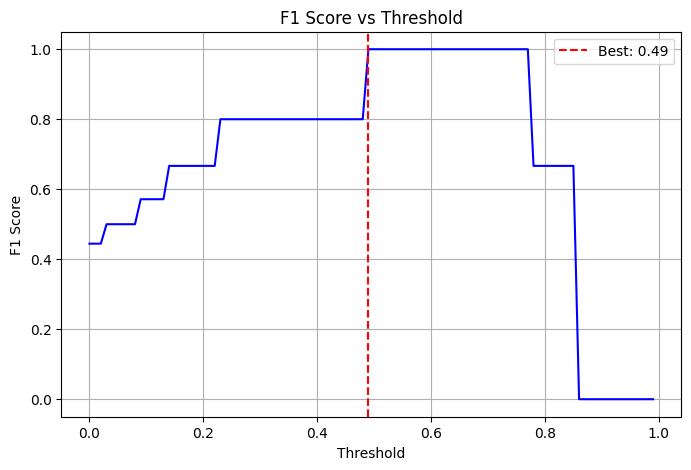

In [35]:
from sklearn.metrics import f1_score

# 1. Create a list of thresholds to test
thresholds = np.arange(0.0, 1.0, 0.01) # 0.00, 0.01, ... 0.99
f1_scores = []

# 2. Loop through them
for t in thresholds:
    # Apply threshold 't'
    y_pred_t = (y_test_prob >= t).astype(int)

    # Calculate F1 Score
    score = f1_score(y_test, y_pred_t)
    f1_scores.append(score)

# 3. Find the Winner
best_f1 = max(f1_scores)
best_thresh = thresholds[f1_scores.index(best_f1)]

print(f"--- Threshold Tuning Results ---")
print(f"Best Threshold: {best_thresh:.2f}")
print(f"Best F1 Score:  {best_f1:.4f}")

# 4. Visualization
plt.figure(figsize=(8, 5))
plt.plot(thresholds, f1_scores, color='blue')
plt.axvline(best_thresh, color='red', linestyle='--', label=f'Best: {best_thresh:.2f}')
plt.title('F1 Score vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()

### Decision Boundary

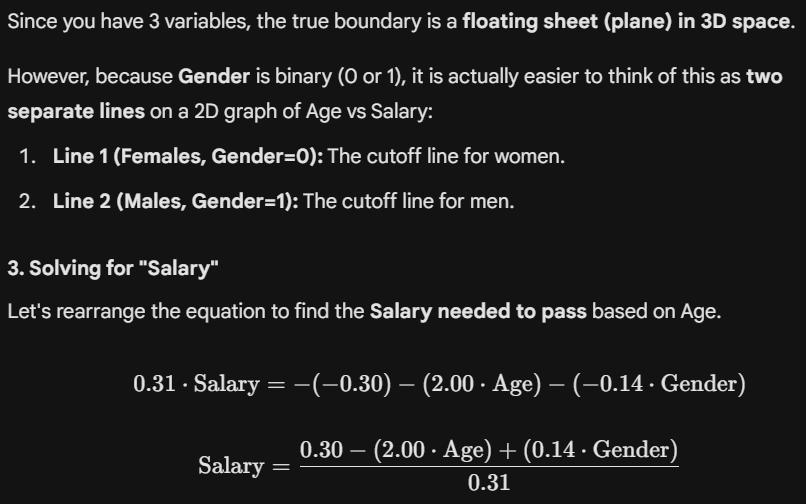

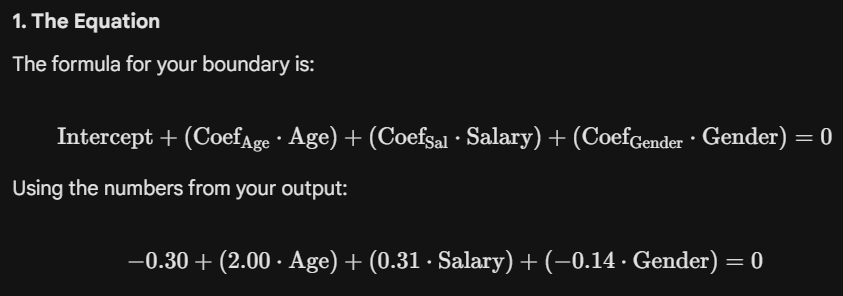

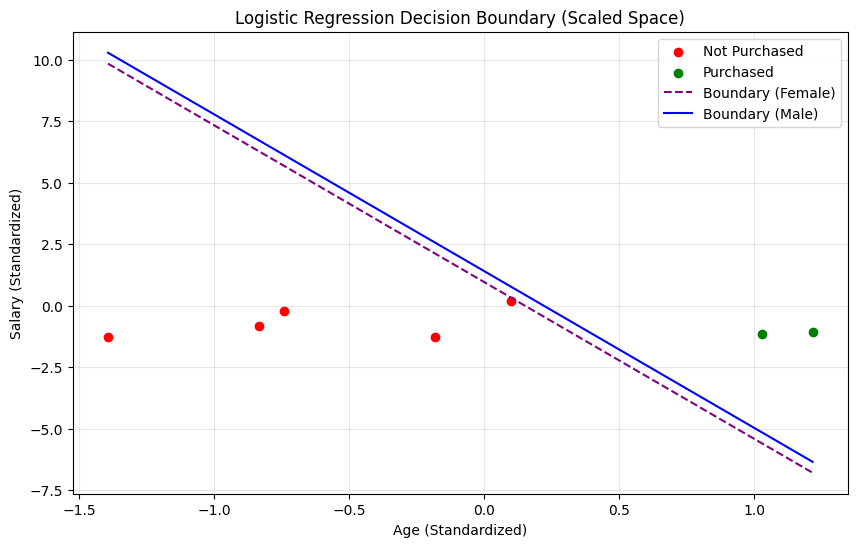

In [58]:
# 1. Define the range of Scaled Ages (e.g., from -2 to +2 standard deviations)
age_range = np.linspace(X_test['Age'].min(), X_test['Age'].max(), 100)

# 2. Calculate the Decision Boundary Line for Females (Gender = 0)
# Formula: Salary = -(Intercept + (w_age * Age) + (w_gender * 0)) / w_salary
salary_boundary_female = -(intercept + (slopes[0] * age_range) + (slopes[2] * 0)) / slopes[1]

# 3. Calculate the Decision Boundary Line for Males (Gender = 1)
# Formula: Salary = -(Intercept + (w_age * Age) + (w_gender * 1)) / w_salary
salary_boundary_male = -(intercept + (slopes[0] * age_range) + (slopes[2] * 1)) / slopes[1]

# 4. Plotting
plt.figure(figsize=(10, 6))

# Plot Data Points (Scatter)
# We color them by whether they actually purchased (Green=Yes, Red=No)
plt.scatter(X_test[y_test==0]['Age'], X_test[y_test==0]['Salary'], color='red', label='Not Purchased')
plt.scatter(X_test[y_test==1]['Age'], X_test[y_test==1]['Salary'], color='green', label='Purchased')

# Plot the Decision Lines
plt.plot(age_range, salary_boundary_female, color='purple', linestyle='--', label='Boundary (Female)')
plt.plot(age_range, salary_boundary_male, color='blue', linestyle='-', label='Boundary (Male)')

plt.title('Logistic Regression Decision Boundary (Scaled Space)')
plt.xlabel('Age (Standardized)')
plt.ylabel('Salary (Standardized)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 3

--- 1. Raw Data (First 5 Rows) ---
   Hours_Studied Review_Course Result
0              1            No   Fail
1              2            No   Fail
2              3            No   Fail
3              4            No   Fail
4              5            No   Fail

--- 2. Processed Data ---
   Hours_Studied  Passed  Review_Course_Yes
0              1       0                  0
1              2       0                  0
2              3       0                  0
3              4       0                  0
4              5       0                  0

--- 5. Predictions (Test Set) ---
Probabilities: [0.37 0.37 0.98 0.76 0.98]
Custom Preds:  [0 0 1 1 1]
Actual Values: [0 0 1 1 1]

--- 6. Performance Metrics ---
Confusion Matrix:
 [[2 0]
 [0 3]]
Accuracy:      1.00
Precision:     1.00
Recall:        1.00
F1 Score:      1.00
Log Loss:      0.2459
AUC Score:     1.0000


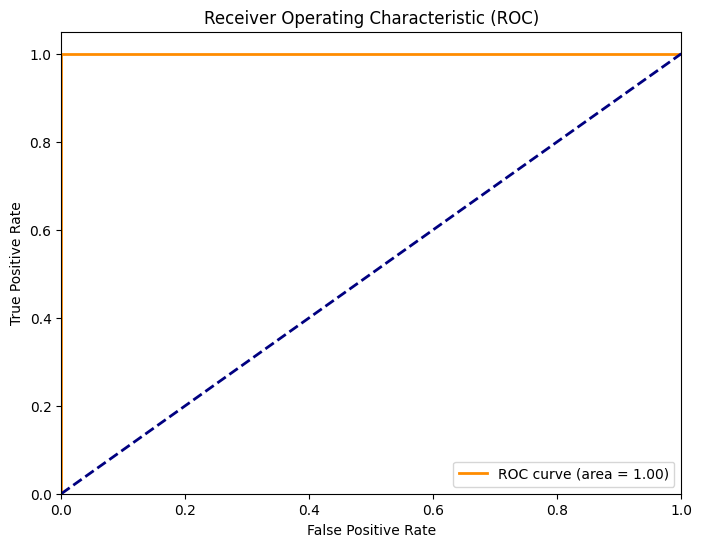


--- 8. Decision Boundaries (X-Value) ---
Hours needed to pass WITHOUT Review Course: 4.62 hours
Hours needed to pass WITH Review Course:    3.74 hours


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss, precision_score, recall_score, f1_score, roc_curve, auc

# --- STEP 1: Generate Realistic Data ---
# Scenario: Predicting Student Results based on Hours Studied and if they took a Review Course.
data = {
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 3, 5, 6, 8, 9, 4, 7, 1, 10],
    'Review_Course': ['No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
                      'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes'],
    # Target is string 'Pass' or 'Fail' initially
    'Result': ['Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass',
               'Fail', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Fail', 'Pass', 'Fail', 'Pass']
}
df = pd.DataFrame(data)

print("--- 1. Raw Data (First 5 Rows) ---")
print(df.head())

# --- STEP 2: Preprocessing ---

# A. Convert Target to Numerical (Specific Method Requested)
# True becomes 1, False becomes 0
df['Passed'] = (df['Result'] == "Pass").astype(int)

# B. Encode Categorical Features (One Hot Encoding)
# We drop 'Result' (string) and use 'Passed' (int) as target
# drop_first=True to avoid Dummy Variable Trap
df_encoded = pd.get_dummies(df.drop('Result', axis=1), columns=['Review_Course'], drop_first=True, dtype=int)

print("\n--- 2. Processed Data ---")
print(df_encoded.head())

# --- STEP 3: Train Test Split ---
X = df_encoded.drop('Passed', axis=1) # Features: Hours_Studied, Review_Course_Yes
y = df_encoded['Passed']              # Target

# Stratify=y ensures we have a mix of Pass/Fail in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# --- STEP 4: Train Model ---
model = LogisticRegression()
model.fit(X_train, y_train)

# --- STEP 5: Custom Prediction Rule ---
# Obtain P(Y=1|x) from the output (Probability of Passing)
p_prob = model.predict_proba(X_test)[:, 1]

# Apply decision rule: predict Class 1 if P(Y=1|x) >= 0.5
# This creates the vector of 0s and 1s
y_pred_custom = (p_prob >= 0.5).astype(int)

print(f"\n--- 5. Predictions (Test Set) ---")
print(f"Probabilities: {np.round(p_prob, 2)}")
print(f"Custom Preds:  {y_pred_custom}")
print(f"Actual Values: {y_test.values}")

# --- STEP 6: Evaluation Metrics ---
print("\n--- 6. Performance Metrics ---")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_custom)
print("Confusion Matrix:\n", cm)

# Accuracy
acc = accuracy_score(y_test, y_pred_custom)
print(f"Accuracy:      {acc:.2f}")

# Precision (What % of predicted passes were real?)
prec = precision_score(y_test, y_pred_custom)
print(f"Precision:     {prec:.2f}")

# Recall (What % of real passes did we catch?)
rec = recall_score(y_test, y_pred_custom)
print(f"Recall:        {rec:.2f}")

# F1 Score (Harmonic mean of Prec/Recall)
f1 = f1_score(y_test, y_pred_custom)
print(f"F1 Score:      {f1:.2f}")

# Log Loss (Penalty for being confident but wrong)
ll = log_loss(y_test, p_prob)
print(f"Log Loss:      {ll:.4f}")

# --- STEP 7: ROC Curve and AUC ---
fpr, tpr, thresholds = roc_curve(y_test, p_prob)
roc_auc = auc(fpr, tpr)

print(f"AUC Score:     {roc_auc:.4f}")

# Plotting ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# --- STEP 8: Calculate Decision Boundary (The "Passing Grade") ---
# Equation: 0 = Intercept + (w1 * Hours) + (w2 * Review_Course_Yes)
# Solve for Hours: Hours = -(Intercept + w2 * Review_Course_Yes) / w1

intercept = model.intercept_[0]
w_hours = model.coef_[0][0]
w_review = model.coef_[0][1]

# Boundary for someone who DID NOT take the course (Review_Course_Yes = 0)
boundary_no_course = -(intercept + (w_review * 0)) / w_hours

# Boundary for someone who DID take the course (Review_Course_Yes = 1)
boundary_with_course = -(intercept + (w_review * 1)) / w_hours

print("\n--- 8. Decision Boundaries (X-Value) ---")
print(f"Hours needed to pass WITHOUT Review Course: {boundary_no_course:.2f} hours")
print(f"Hours needed to pass WITH Review Course:    {boundary_with_course:.2f} hours")